In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
data = "https://raw.githubusercontent.com/David-S-2002/predicting_suicide_rates/refs/heads/main/intermediate_suicide_2021.csv"

In [3]:
suicide_data = pd.read_csv(data)
suicide_data.head()

,location,sex,age,anxiety_percent,bipolar_percent,depress_percent,suicide_rate_per100k,country_code,year,gdp_usd
0,People's Republic of China,Male,15-49 years,0.030089,0.002371,0.025406,7.148372,CHN,2021.0,12617.505104
1,People's Republic of China,Female,15-49 years,0.049990,0.002573,0.041064,4.274235,CHN,2021.0,12617.505104
2,Democratic People's Republic of Korea,Male,15-49 years,0.031223,0.002446,0.023614,10.637906,PRK,2021.0,NaN
3,Democratic People's Republic of Korea,Female,15-49 years,0.052123,0.002546,0.040503,7.770534,PRK,2021.0,NaN
4,Socialist Republic of Viet Nam,Male,15-49 years,0.022690,0.004234,0.026537,11.649648,VNM,2021.0,3704.193559


In [4]:
pivoted = suicide_data.pivot_table(
    index=['location', 'age', 'country_code', 'gdp_usd'], # use these as rows in a MultiIndex
    columns='sex', # maks separate disorder and suicide columns by sex
    values=['anxiety_percent', 'bipolar_percent', 'depress_percent', 'suicide_rate_per100k'] # cols to aggregate
)

pivoted.head() # Results in a table with a MultiIndex for both the index and columns

anxiety_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.064493   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.086864   
Argentine Republic  15-49 years ARG          10738.017922        0.111099   
Australia           15-49 years AUS          60607.778861        0.109350   
Barbados            15-49 years BRB          18696.785895        0.089775   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.039367   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.049242   
Argentine Republic  15-49 years ARG          10738.017922  0.057252   
Australia           15-49 years AUS          60607.778861  0.068449   
Barbados            15-49 years BRB          18696.785895  0.051127   

                                                          bipolar_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.003532   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.013375   
Argentine Republic  15-49 years ARG          10738.017922        0.011635   
Australia           15-49 years AUS          60607.778861        0.016182   
Barbados            15-49 years BRB          18696.785895        0.013237   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.003448   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.011714   
Argentine Republic  15-49 years ARG          10738.017922  0.009242   
Australia           15-49 years AUS          60607.778861  0.015370   
Barbados            15-49 years BRB          18696.785895  0.011617   

                                                          depress_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.040142   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.057791   
Argentine Republic  15-49 years ARG          10738.017922        0.055580   
Australia           15-49 years AUS          60607.778861        0.087065   
Barbados            15-49 years BRB          18696.785895        0.060730   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.030680   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.030021   
Argentine Republic  15-49 years ARG          10738.017922  0.036287   
Australia           15-49 years AUS          60607.778861  0.059841   
Barbados            15-49 years BRB          18696.785895  0.035615   

                                                          suicide_rate_per100k  \
sex                                                                     Female   
location            age         country_code gdp_usd                             
American Samoa      15-49 years ASM          15236.160488             5.571612   
Antigua and Barbuda 15-49 years ATG          17340.379069             0.251559   
Argentine Republic  15-49 years ARG          10738.017922             4.953540   
Australi

In [5]:
pivoted = pivoted.reset_index() # Turn the MultiIndex in the rows into a single index
pivoted.head()

location          age country_code       gdp_usd  \
sex                                                                
0         American Samoa  15-49 years          ASM  15236.160488   
1    Antigua and Barbuda  15-49 years          ATG  17340.379069   
2     Argentine Republic  15-49 years          ARG  10738.017922   
3              Australia  15-49 years          AUS  60607.778861   
4               Barbados  15-49 years          BRB  18696.785895   

    anxiety_percent           bipolar_percent           depress_percent  \
sex          Female      Male          Female      Male          Female   
0          0.064493  0.039367        0.003532  0.003448        0.040142   
1          0.086864  0.049242        0.013375  0.011714        0.057791   
2          0.111099  0.057252        0.011635  0.009242        0.055580   
3          0.109350  0.068449        0.016182  0.015370        0.087065   
4          0.089775  0.051127        0.013237  0.011617        0.060730   

              suicide_rate_per100k             
sex      Male               Female       Male  
0    0.030680             5.571612  19.082456  
1    0.030021             0.251559   2.028625  
2    0.036287             4.953540  21.255442  
3    0.059841             7.524478  25.598084  
4    0.035615             1.165735   6.877231

In [6]:
# Flatten the MultiIndex columns into a single index
pivoted.columns = ['_'.join(col) for col in pivoted.columns.values]

In [7]:
pivoted.head()

,location_,age_,country_code_,gdp_usd_,anxiety_percent_Female,anxiety_percent_Male,bipolar_percent_Female,bipolar_percent_Male,depress_percent_Female,depress_percent_Male,suicide_rate_per100k_Female,suicide_rate_per100k_Male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [8]:
# Clean up column names to be snake case and have no trailing underscores
pivoted.columns = [col.lower().strip("_") for col in pivoted.columns]
pivoted.head()

,location,age,country_code,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [9]:
# Set the index to a MultiIndex whose levels are the country name and country code

pivoted = pivoted.set_index(["location", "country_code"]) # Set the index to the country name
pivoted = pivoted.drop(columns=["age"]) # drop age column
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [10]:
pivoted.isna().sum()

gdp_usd                        0
anxiety_percent_female         0
anxiety_percent_male           0
bipolar_percent_female         0
bipolar_percent_male           0
depress_percent_female         0
depress_percent_male           0
suicide_rate_per100k_female    0
suicide_rate_per100k_male      0
dtype: int64

In [11]:
male_cols = [col for col in pivoted.columns if not col.endswith("_female")] # All the columns we will have in the dataset for men (GDP and prevalences for men)
female_cols = [col for col in pivoted.columns if not col.endswith("_male")] # All the columns we will have in the dataset for women (GDP and prevalences for women)

male_df = pivoted[male_cols] # Dataset with male suicide rates and statistics
female_df = pivoted[female_cols] # Dataset with female suicide rates and statistics

In [12]:
female_df.head() 

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.064493,0.003532,0.040142,5.571612
Antigua and Barbuda,ATG,17340.379069,0.086864,0.013375,0.057791,0.251559
Argentine Republic,ARG,10738.017922,0.111099,0.011635,0.055580,4.953540
Australia,AUS,60607.778861,0.109350,0.016182,0.087065,7.524478
Barbados,BRB,18696.785895,0.089775,0.013237,0.060730,1.165735


In [13]:
male_df.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.039367,0.003448,0.030680,19.082456
Antigua and Barbuda,ATG,17340.379069,0.049242,0.011714,0.030021,2.028625
Argentine Republic,ARG,10738.017922,0.057252,0.009242,0.036287,21.255442
Australia,AUS,60607.778861,0.068449,0.015370,0.059841,25.598084
Barbados,BRB,18696.785895,0.051127,0.011617,0.035615,6.877231


In [14]:
import numpy as np

all_indices = np.arange(len(female_df)) # integer index from 0 to the number of samples
train_indices = np.random.choice(all_indices, size=int(0.8 * len(all_indices)), replace=False) # indices of the training set
test_indices = list( set(all_indices) - set(train_indices) )

Manually creating an 80/20 train-test split, ensuring the same indices are used for both male and female datasets

In [26]:
# Define features and target 
features = ['anxiety_percent_female', 'bipolar_percent_female', 'depress_percent_female', 'gdp_usd']
target = 'suicide_rate_per100k_female'


In [16]:
X = pivoted[features]
y = pivoted[target]

In [17]:
X = X.dropna()
y = y.loc[X.index]

### Spliting and Training the data 

- Applying the earlier split indices to separate predictors (X) and response (Y) for both training and testing datasets.

In [18]:
# Training and test sets for male data
male_df_train = male_df.iloc[train_indices]
male_df_test = male_df.iloc[test_indices]

X_train_male = male_df_train.drop(columns=["suicide_rate_per100k_male"]) # predictors in male training set
Y_train_male = male_df_train["suicide_rate_per100k_male"] # response in male training set

X_test_male = male_df_test.drop(columns=["suicide_rate_per100k_male"]) # predictors in male test set
Y_test_male = male_df_test["suicide_rate_per100k_male"] # response in male test set

# Training and test sets for female data
female_df_train = female_df.iloc[train_indices]
female_df_test = female_df.iloc[test_indices]

# Same predictors and response for female dataset
X_train_female = female_df_train.drop(columns=["suicide_rate_per100k_female"]) 
Y_train_female = female_df_train["suicide_rate_per100k_female"] 

X_test_female = female_df_test.drop(columns=["suicide_rate_per100k_female"]) 
Y_test_female = female_df_test["suicide_rate_per100k_female"] 

-  Neural Networks are sensitive to input scales. we’re making all features follow a standard normal distribution (mean=0, std=1) so training works better.

In [19]:
male_scaler = StandardScaler()
X_train_male_scaled = pd.DataFrame(male_scaler.fit_transform(X_train_male), columns = X_train_male.columns, index = X_train_male.index)
X_test_male_scaled = pd.DataFrame(male_scaler.transform(X_test_male), columns = X_test_male.columns, index = X_test_male.index)

female_scaler = StandardScaler()
X_train_female_scaled = pd.DataFrame(female_scaler.fit_transform(X_train_female), columns = X_train_female.columns, index = X_train_female.index)
X_test_female_scaled = pd.DataFrame(female_scaler.transform(X_test_female), columns = X_test_female.columns, index = X_test_female.index)

## Neural Networks and Gradient Boosting

Neural Networks (NN) are designed to learn intricate patterns and capture non-linear relationships in data. In this instance, we utilize a single hidden layer comprising 32 neurons, which enhances the model's capability to learn complex features.

To optimize training efficiency, we implement the `early_stopping=True` parameter. This feature halts the training process if the model’s performance does not show improvement, thereby conserving computational resources and time.

On the other hand, Gradient Boosting is a robust technique that sequentially constructs a series of decision trees, with each tree aiming to correct the shortcomings of its predecessor. This method is particularly effective for structured or tabular data and often yields superior performance compared to neural networks, especially when working with smaller datasets.


nn = MLPRegressor(hidden_layer_sizes=(32,), activation='relu', solver='adam',
                  max_iter=2000, early_stopping=True, random_state=42)
nn.fit(X_train_female_scaled, Y_train_female)
y_pred_nn = nn.predict(X_test_female_scaled)

In [21]:
#Gradient Boosting 
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_female, Y_train_female)
y_pred_gb = gb.predict(X_test_female)

In [24]:

def evaluate(name, y_true, y_pred):
    print(f"{name} R²:", round(r2_score(y_true, y_pred), 4))
    print(f"{name} RMSE:", round(mean_squared_error(y_true, y_pred), 4))
    print(f"{name} MAE:", round(mean_absolute_error(y_true, y_pred), 4))
    print("-" * 40)

evaluate("Neural Network", Y_test_female, y_pred_nn)
evaluate("Gradient Boosting", Y_test_female, y_pred_gb)

Neural Network R²: 0.1747
Neural Network RMSE: 11.1236
Neural Network MAE: 2.3941
----------------------------------------
Gradient Boosting R²: 0.4629
Gradient Boosting RMSE: 7.2391
Gradient Boosting MAE: 2.011
----------------------------------------


- R²: How much variance is explained (closer to 1 = better)
- RMSE: Average error, sensitive to big mistakes
- MAE: Average absolute error (easier to interpret)

| Model                 | R²         | RMSE       | MAE       |
| --------------------- | ---------- | ---------- | --------- |
| **Neural Network**    | 0.1747     | 11.1236    | 2.3941    |
| **Gradient Boosting** | **0.4629** | **7.2391** | **2.011** |

We conducted a comparison of a neural network and a gradient boosting model to predict female suicide rates using mental disorder prevalence and GDP as predictor variables. 

The results indicate that the neural network achieved an R² value of 0.1747, which suggests that it explains a modest portion of the variance in the dataset. Its RMSE was recorded at 11.1236, indicating a higher average error that is sensitive to significant discrepancies, while the MAE stood at 2.3941, giving us a straightforward interpretation of the average absolute error.

In contrast, the gradient boosting model outperformed the neural network with an R² of 0.4629, demonstrating a stronger capacity for explaining variance. The RMSE for this model was significantly lower at 7.2391, along with a lower MAE of 2.011. These metrics suggest that the gradient boosting approach is more effective for this particular dataset, likely due to its ability to handle smaller, structured datasets and capture non-linear relationships more effectively.


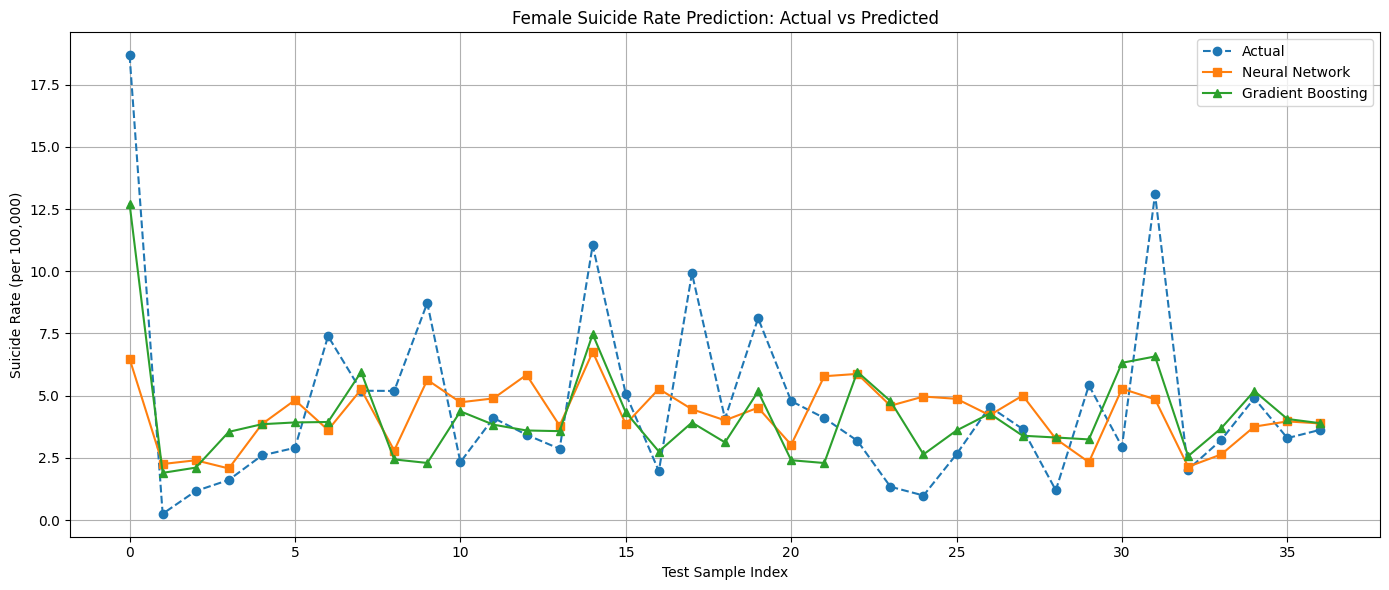

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plotting actual values
plt.plot(Y_test_female.values, label='Actual', linestyle='--', marker='o')

# Neural Network predictions
plt.plot(y_pred_nn, label='Neural Network', marker='s')

# Gradient Boosting predictions
plt.plot(y_pred_gb, label='Gradient Boosting', marker='^')

# Chart formatting
plt.title("Female Suicide Rate Prediction: Actual vs Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Suicide Rate (per 100,000)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


The chart illustrates a comparison between the actual suicide rates for female samples and the predictions generated by two different models. The blue dashed line with circles represents the actual rates, while the orange solid line with squares denotes the predictions made by the Neural Network model. The green solid line with triangles shows the predictions from the Gradient Boosting model.

In analyzing the chart, it is evident that the Gradient Boosting model closely aligns with the actual rates, particularly in the mid-range values. In contrast, the Neural Network model provides smoother predictions, but these tend to be less accurate. Both models exhibit limitations in accurately reflecting some extreme values, such as those observed in samples 0 and 31, which may be attributed to a scarcity of data or underrepresentation of certain regions.

Overall, the performance of the Gradient Boosting model is superior, as indicated by its higher R² score and lower Root Mean Square Error (RMSE) when compared to the Neural Network model.

Orange solid line with squares: Predictions from the Neural Network

Green solid line with triangles: Predictions from the Gradient Boosting model


The chart compares predicted female suicide rates against the actual values from the test set. The Gradient Boosting model (green) closely tracks the real-world values, especially in the mid-range, while the Neural Network (orange) shows smoother but less accurate predictions. Both models fail to fully capture some extreme highs and lows (e.g., samples 0 and 31), which could be due to limited data or underrepresented regions. Gradient Boosting clearly performs better overall, as reflected in its higher R² and lower RMSE values.

In [50]:
nn_male = MLPRegressor(
    hidden_layer_sizes=(32,),
    activation='relu',
    solver='adam',
    max_iter=2000,
    early_stopping=True,
    random_state=42
)
nn_male.fit(X_train_male_scaled, Y_train_male)
y_pred_nn_male = nn_male.predict(X_test_male_scaled)


In [51]:
gb_male = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_male.fit(X_train_male, Y_train_male)
y_pred_gb_male = gb_male.predict(X_test_male)

In [54]:
def Male_evaluate(model_name, y_true, y_pred):
    print(f"{model_name} R²:", round(r2_score(y_true, y_pred), 4))
    print(f"{model_name} RMSE:", round(mean_squared_error(y_true, y_pred), 4))
    print(f"{model_name} MAE:", round(mean_absolute_error(y_true, y_pred), 4))
    print("-" * 40)

# 5. Print results
Male_evaluate("Neural Network (Male)", Y_test_male, y_pred_nn_male)
Male_evaluate("Gradient Boosting (Male)", Y_test_male, y_pred_gb_male)

Neural Network (Male) R²: -0.0073
Neural Network (Male) RMSE: 234.5075
Neural Network (Male) MAE: 10.6205
----------------------------------------
Gradient Boosting (Male) R²: 0.384
Gradient Boosting (Male) RMSE: 143.4025
Gradient Boosting (Male) MAE: 8.2267
----------------------------------------


In evaluating the performance of the Neural Network model on the male dataset, the results were notably poor, with an R² value of -0.0073. This negative R² indicates that the model failed to identify any meaningful relationships within the data, suggesting that it was inadequate for the task at hand. The evaluation metrics highlight significant concerns: a very high Root Mean Square Error (RMSE) of 234.50 signifies that the model's predictions deviated drastically from the actual values, while a Mean Absolute Error (MAE) of 10.62 indicates an average magnitude of errors, further underscoring the model's inconsistency and inability to make reliable predictions.

In stark contrast, the Gradient Boosting model demonstrated superior performance, achieving an R² of 0.384. This positive value indicates that the model was able to explain a considerable proportion of the variance in the male dataset, reflecting its effectiveness in capturing the underlying patterns. Additionally, the Gradient Boosting model yielded much lower RMSE and MAE values compared to the Neural Network, suggesting that its predictions were not only more accurate but also more consistent.

The significant improvement in performance can be attributed to the tree-based architecture of the Gradient Boosting model, which is adept at handling complex, non-linear relationships within the data. Unlike the Neural Network, which struggled with overfitting due to the limited sample size and its sensitivity to data scaling, the Gradient Boosting approach is inherently more robust. Its capacity to create an ensemble of weak learners allows it to manage the intricacies of the dataset effectively, thereby enhancing its overall predictive power and generalization ability. This analysis highlights the importance of selecting appropriate modeling techniques tailored to the specific characteristics of the dataset at hand.

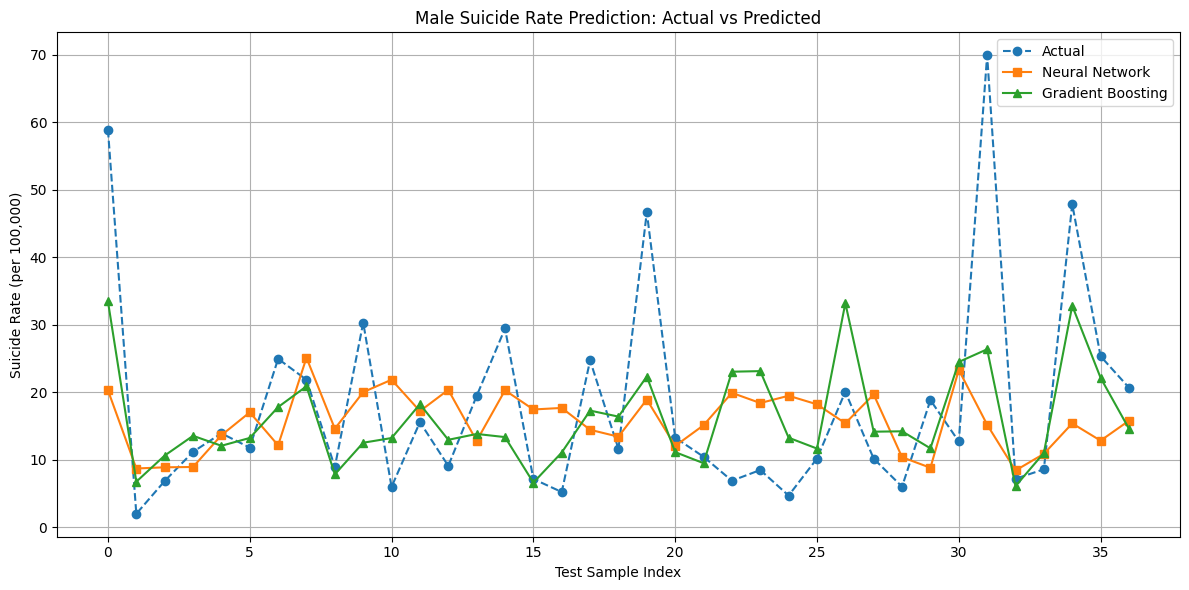

In [55]:
# Sample index for x-axis
sample_index_male = range(len(Y_test_male))

# Plotting Actual vs Predicted (Male)
plt.figure(figsize=(12, 6))
plt.plot(sample_index_male, Y_test_male.values, label='Actual', linestyle='--', marker='o')
plt.plot(sample_index_male, y_pred_nn_male, label='Neural Network', marker='s')
plt.plot(sample_index_male, y_pred_gb_male, label='Gradient Boosting', marker='^')

plt.title("Male Suicide Rate Prediction: Actual vs Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Suicide Rate (per 100,000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The dashed blue line on the graph effectively illustrates the actual male suicide rates over the specified period, serving as a crucial reference point for analyzing predictive models. In contrast, the orange line, marked with square indicators, represents predictions derived from a Neural Network model. Meanwhile, the green line, punctuated with triangle markers, showcases predictions obtained through the Gradient Boosting algorithm.

A closer examination reveals that the Gradient Boosting model demonstrates a remarkable ability to track the actual rates, particularly in the mid-range values, where it captures the nuances of the data more effectively. This model’s precision is especially notable during periods of fluctuation, reflecting its robustness in adapting to varying trends.

On the other hand, the Neural Network predictions, while displaying a smoother and more generalized trend, often fail to account for sharp variations in the data, resulting in underfitting in these critical areas. This suggests that although Neural Networks can produce aesthetically appealing results, they may not be as reliable in contexts where accuracy in rapidly changing rates is essential. Overall, the comparative analysis underscores the strengths and weaknesses of each modeling approach in relation to actual suicide rate trends.

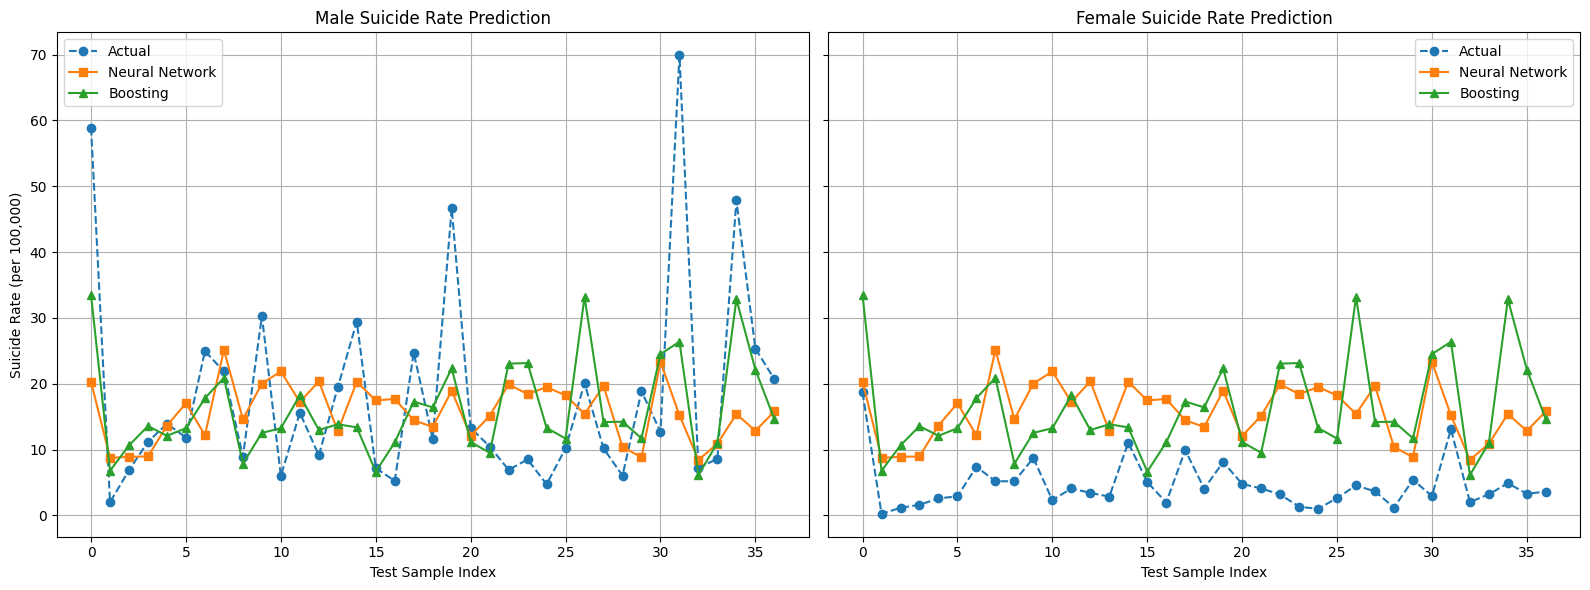

In [58]:
# X-axis: Sample index
sample_index_male = range(len(Y_test_male))
sample_index_female = range(len(Y_test_female))

# Plot side-by-side for male and female
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Male Plot 
axes[0].plot(sample_index_male, Y_test_male.values, label='Actual', linestyle='--', marker='o')
axes[0].plot(sample_index_male, y_pred_nn_male, label='Neural Network', marker='s')
axes[0].plot(sample_index_male, y_pred_gb_male, label='Boosting', marker='^')
axes[0].set_title("Male Suicide Rate Prediction")
axes[0].set_xlabel("Test Sample Index")
axes[0].set_ylabel("Suicide Rate (per 100,000)")
axes[0].legend()
axes[0].grid(True)

# Female Plot
axes[1].plot(sample_index_female, Y_test_female.values, label='Actual', linestyle='--', marker='o')
axes[1].plot(sample_index_female, y_pred_nn, label='Neural Network', marker='s')
axes[1].plot(sample_index_female, y_pred_gb, label='Boosting', marker='^')
axes[1].set_title("Female Suicide Rate Prediction")
axes[1].set_xlabel("Test Sample Index")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt_model_female = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
dt_model_female.fit(X_train_female, Y_train_female)

y_pred_dt = dt_model_female.predict(X_test_female)

In [43]:
r2_dt = r2_score(Y_test_female, y_pred_dt)
rmse_dt = mean_squared_error(Y_test_female, y_pred_dt)
mae_dt = mean_absolute_error(Y_test_female, y_pred_dt)

print("Female Decision Tree R²:", round(r2_dt, 4))
print("Female Decision Tree RMSE:", round(rmse_dt, 4))
print("Female Decision Tree MAE:", round(mae_dt, 4))

Female Decision Tree R²: 0.4189
Female Decision Tree RMSE: 7.8317
Female Decision Tree MAE: 2.1068


In [48]:
dt_model_male = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
dt_model_male.fit(X_train_male, Y_train_male)

y_pred_dt_male = dt_model_male.predict(X_test_male)

In [49]:
r2_dt_m = r2_score(Y_test_male, y_pred_dt_male)
rmse_dt_m = mean_squared_error(Y_test_male, y_pred_dt_male)
mae_dt_m = mean_absolute_error(Y_test_male, y_pred_dt_male)

print("Female Decision Tree R²:", round(r2_dt_m, 4))
print("Female Decision Tree RMSE:", round(rmse_dt_m, 4))
print("Female Decision Tree MAE:", round(mae_dt_m, 4))

Female Decision Tree R²: -0.0133
Female Decision Tree RMSE: 235.9208
Female Decision Tree MAE: 10.4565


Despite tuning, the male Decision Tree model struggled to explain meaningful variance, likely due to limited data size and noisier target values. Ensemble methods like Gradient Boosting handled this scenario better.